# 2025B

In [39]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import deg2rad,rad2deg
import pandas as pd
from scipy.signal import savgol_filter,find_peaks

In [2]:
fm = matplotlib.font_manager.fontManager
fm.addfont("./仿宋_GB2312.TTF")
fm.addfont("./times.ttf")

# 设置中文字体和负号正常显示,启用LaTeX排版
plt.rcParams["font.sans-serif"] = ["FangSong_GB2312", "times"]
plt.rcParams["axes.unicode_minus"] = False

In [3]:
sic_10 = pd.read_excel("../data/附件/附件1.xlsx")
sic_15 = pd.read_excel("../data/附件/附件2.xlsx")
si_10 = pd.read_excel("../data/附件/附件3.xlsx")
si_15 = pd.read_excel("../data/附件/附件4.xlsx")

In [4]:
sic_10_color = "#1976D2"
sic_15_color = "#BBDEFB"
si_10_color = "#FF2121"
si_15_color = "#8BC34A"
total_color = "#BB88BB"

### 原始数据绘图

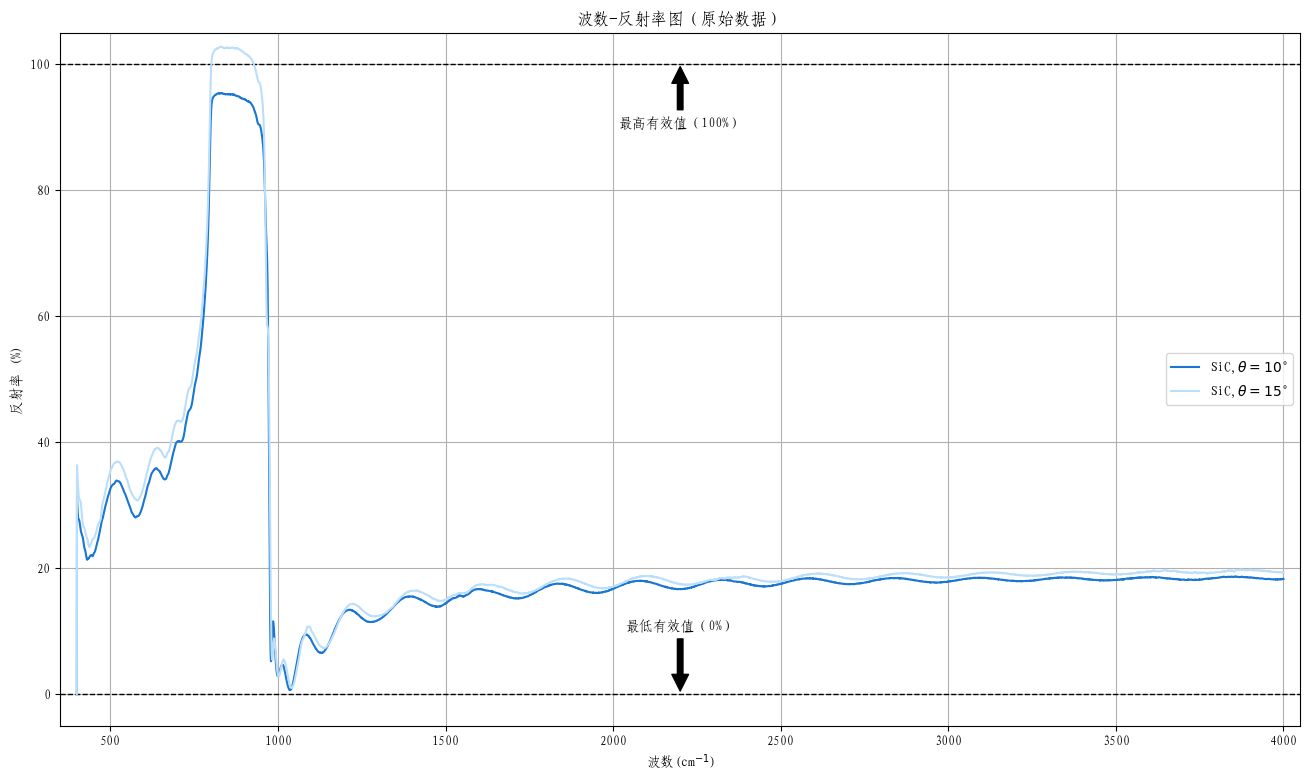

In [5]:
plt.figure(figsize=(16,9))
plt.plot([350,4050],[100,100],color="black",linestyle="--",linewidth=1)
plt.plot([350,4050],[0,0],color="black",linestyle="--",linewidth=1)
plt.plot(sic_10.loc[:,'波数 (cm-1)'],sic_10.loc[:,'反射率 (%)'],color=sic_10_color,label=r"SiC,$\theta=10^{\circ}$")
plt.plot(sic_15.loc[:,'波数 (cm-1)'],sic_15.loc[:,'反射率 (%)'],color=sic_15_color,label=r"SiC,$\theta=15^{\circ}$")
# plt.plot(si_10.loc[:,'波数 (cm-1)'],si_10.loc[:,'反射率 (%)'],color=si_10_color,label=r"Si ,$\theta=10^{\circ}$")
# plt.plot(si_15.loc[:,'波数 (cm-1)'],si_15.loc[:,'反射率 (%)'],color=si_15_color,label=r"Si ,$\theta=15^{\circ}$")
plt.xlabel("波数(cm$^{-1}$)")
plt.ylabel("反射率 (%)")
plt.annotate('最高有效值（100%）', xy=(2200, 100), xytext=(2200, 90),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center')
plt.annotate('最低有效值（0%）', xy=(2200, 0), xytext=(2200, 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center')
plt.xlim([350,4050])
plt.ylim([-5,105])
plt.legend()
plt.grid(True)
plt.title("波数-反射率图（原始数据）")
plt.savefig("../figure/波数-反射率图（原始数据）.png")

### 数据清洗

#### 缺失值处理

In [6]:
sic_10.dropna(inplace=True)
sic_15.dropna(inplace=True)
si_10.dropna(inplace=True)
si_15.dropna(inplace=True)

#### 异常值处理

In [7]:
sic_10 = sic_10[sic_10['反射率 (%)']>=0][sic_10['反射率 (%)']<100]
sic_15 = sic_15[sic_15['反射率 (%)']>=0][sic_15['反射率 (%)']<100]
si_10 = si_10[si_10['反射率 (%)']>=0][si_10['反射率 (%)']<100]
si_15 = si_15[si_15['反射率 (%)']>=0][si_15['反射率 (%)']<100]

#### 数据平滑

In [8]:
window_length = 51
polyorder = 3

sic_10['smooth_R'] = savgol_filter(
    sic_10['反射率 (%)'],
    window_length=window_length,
    polyorder=polyorder,
    mode="interp"
)
sic_15['smooth_R'] = savgol_filter(
    sic_15['反射率 (%)'],
    window_length=window_length,
    polyorder=polyorder,
    mode="mirror"
)
si_10['smooth_R'] = savgol_filter(
    si_10['反射率 (%)'],
    window_length=window_length,
    polyorder=polyorder,
    mode="mirror"
)
si_10['smooth_R'] = savgol_filter(
    si_10['反射率 (%)'],
    window_length=window_length,
    polyorder=polyorder,
    mode="mirror"
)

#### 探测波峰

In [9]:
wan_sic_10 = sic_10['波数 (cm-1)'].values
ref_sic_10 = sic_10['反射率 (%)'].values
wan_sic_15 = sic_15['波数 (cm-1)'].values
ref_sic_15 = sic_15['反射率 (%)'].values

peak_10_indics, properties = find_peaks(ref_sic_10, distance=100, prominence=0.8)
peak_15_indics, properties = find_peaks(ref_sic_15, distance=100, prominence=0.8)

peak_wave_n_10 = wan_sic_10[peak_10_indics]
refv_wave_n_10 = ref_sic_10[peak_10_indics]
peak_wave_n_15 = wan_sic_15[peak_15_indics]
refv_wave_n_15 = ref_sic_15[peak_15_indics]

In [32]:
print("波数 (cm-1) 反射率（%） ")
for i in range(len(peak_10_indics)):
    if (i+1)%3!=0:
        print(f"{peak_wave_n_10[i]:10} & {refv_wave_n_10[i]:10.6}",end =' & ')
    else:
        print(f"{peak_wave_n_10[i]:10} & {refv_wave_n_10[i]:10.6}",end ='\\\\\n')
print()
for i in range(len(peak_10_indics)):
    if (i+1)%3!=0:
        print(f"{peak_wave_n_15[i]:10} & {refv_wave_n_15[i]:10.6}",end =' & ')
    else:
        print(f"{peak_wave_n_15[i]:10} & {refv_wave_n_15[i]:10.6}",end ='\\\\\n')

波数 (cm-1) 反射率（%） 
  400.1569 &    31.2932 &   517.7933 &    33.8907 &    636.394 &     35.881\\
  832.6155 &     95.385 &   1012.445 &    4.67879 &   1085.727 &    9.43943\\
   1216.38 &    13.3879 &   1401.513 &    15.4973 &   1595.324 &    16.6738\\
  1836.865 &    17.5385 &   2079.851 &    17.9926 &   2322.356 &    18.1737\\
  2586.074 &    18.3814 & 
  400.1569 &    36.3367 &   519.7218 &    36.8981 &   639.7689 &    39.0793\\
  927.5925 &    99.9829 &   988.3392 &    8.82083 &   1088.137 &    10.7283\\
  1221.684 &    14.3203 &   1416.459 &    16.4243 &   1607.377 &    17.4551\\
  1866.756 &    18.3449 &   2089.976 &    18.7524 &    2389.37 &    18.6991\\
  2617.411 &    19.1469 & 

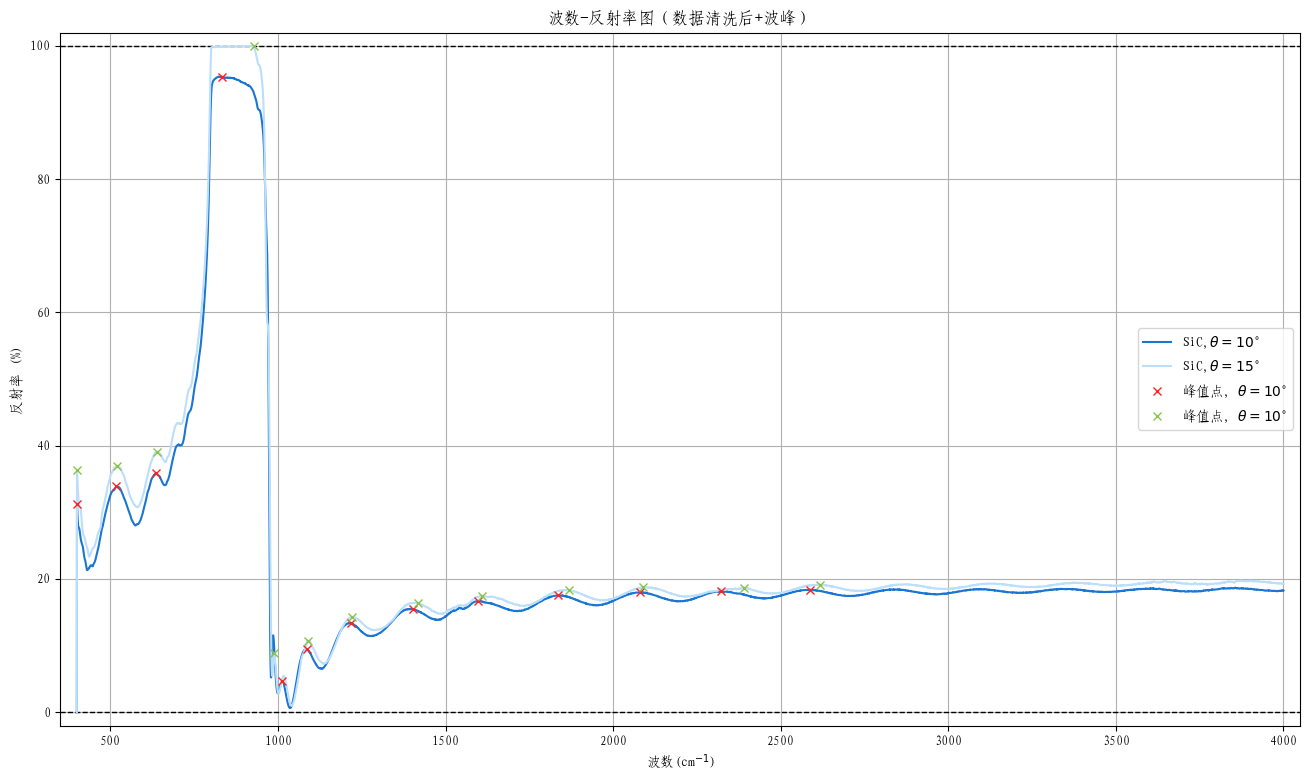

In [21]:
plt.figure(figsize=(16,9))
plt.plot([350,4050],[100,100],color="black",linestyle="--",linewidth=1)
plt.plot([350,4050],[0,0],color="black",linestyle="--",linewidth=1)
plt.plot(sic_10.loc[:,'波数 (cm-1)'],sic_10.loc[:,'反射率 (%)'],color=sic_10_color,label=r"SiC,$\theta=10^{\circ}$")
plt.plot(sic_15.loc[:,'波数 (cm-1)'],sic_15.loc[:,'反射率 (%)'],color=sic_15_color,label=r"SiC,$\theta=15^{\circ}$")
plt.plot(peak_wave_n_10,refv_wave_n_10,'x',color=si_10_color,label=r"峰值点, $\theta=10^{\circ}$")
plt.plot(peak_wave_n_15,refv_wave_n_15,'x',color=si_15_color,label=r"峰值点, $\theta=10^{\circ}$")
# plt.plot(si_15.loc[:,'波数 (cm-1)'],si_15.loc[:,'反射率 (%)'],color=si_15_color,label=r"Si ,$\theta=15^{\circ}$")
plt.xlabel("波数(cm$^{-1}$)")
plt.ylabel("反射率 (%)")
# plt.annotate('最高有效值（100%）', xy=(2200, 100), xytext=(2200, 90),
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              horizontalalignment='center')
# plt.annotate('最低有效值（0%）', xy=(2200, 0), xytext=(2200, 10),
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              horizontalalignment='center')
plt.xlim([350,4050])
plt.ylim([-2,102])
plt.legend()
plt.grid(True)
plt.title("波数-反射率图（数据清洗后+波峰）")
plt.savefig("../figure/波数-反射率图（数据清洗后+波峰）.png")

### 计算


折射定律：
$$
\frac{\sin{\theta_1}}{\sin{\theta_2}} = \frac{n_0}{n_1} \\
$$
$$
n_0\sin{\theta_1} = n_1\sin{\theta_2}
$$

波长-频率关系：
$$
\lambda = \frac{c}{\nu}
$$

柯西等式(取前三项)：
$$
n(\lambda) = A + \frac{B}{\lambda^2} + \frac{C}{\lambda^4}
$$

当$\theta_1=10^{\circ}$时，$\lambda_1$：

$$
2d\sqrt{n^2(\lambda_1)-\sin^2{\theta_1}} = m_1\lambda_1
$$

当$\theta_1=15^{\circ}$时，$\lambda_2$：
$$
2d\sqrt{n^2(\lambda_2)-\sin^2{\theta_1}} = m_2\lambda_2
$$

> 经分析可知，$\lambda_1$和$\lambda_2$在波峰或波谷时取值近似，$m\lambda_m$在一般是恒定的，故，1式比2式可得

$$
\frac{\lambda_1}{\lambda_2} = \frac{\sqrt{n^2-sin^2{10^\circ}}}{\sqrt{n^2-\sin^2{15^\circ}}}
$$

整理可得
$$
n = \sqrt{\frac{\lambda_2^2\sin^2{10^\circ}-\lambda_1^2\sin^2{15^\circ}}{\lambda_2^2-\lambda_1^2}}
$$

使用xxx法探测得到波峰所在的波数集合$\mathcal{D}_1(\theta_1=10^\circ),\mathcal{D}_2(\theta_1=15^\circ),d_i,i = 1,2,...,N$，分别使用这些点求出对应的$n$并带入柯西等式，求得未知项$A,B,C$

In [40]:
def get_n(lambda_1:np.float64,lambda_2:np.float64):
    return ((lambda_2**2)*(np.sin(deg2rad(10))**2)-(lambda_1**2)*(np.sin(deg2rad(15))**2))/(lambda_2**2-lambda_1**2)

In [42]:
def cauchy_equation(args,lambda_:np.float64):
    A,B,C = args
    return A + B/(lambda_**2) + C/(lambda_**4)

In [53]:
peak_wave_n_10

array([ 400.1569,  517.7933,  636.394 ,  832.6155, 1012.445 , 1085.727 ,
       1216.38  , 1401.513 , 1595.324 , 1836.865 , 2079.851 , 2322.356 ,
       2586.074 ])

In [54]:
peak_wave_n_15

array([ 400.1569,  519.7218,  639.7689,  927.5925,  988.3392, 1088.137 ,
       1221.684 , 1416.459 , 1607.377 , 1866.756 , 2089.976 , 2389.37  ,
       2617.411 ])

In [65]:
eq1 = get_n(peak_wave_n_10[7],peak_wave_n_15[7])

In [66]:
print(eq1)

-1.6876632349650385


In [69]:
import sympy
from sympy import pi,sin,cos

In [68]:
x = sympy.symbols("x")

In [74]:
a = 517.7933
b = 519.7218

eq = x+(b**2*sin(10*2*pi/360)**2-a**2*sin(15*2*pi/360))/(b**2-a**2)

In [84]:
eq.subs([(x,0)])

-33.4995360589297*sqrt(6) + 134.998144235719*sin(pi/18)**2 + 33.4995360589297*sqrt(2)

### Test

In [30]:
# df.plot("wave_number")

In [29]:
# # 参数设置
# window_length = 51  # 奇数窗口长度
# polyorder = 3       # 多项式阶数

# # 对反射率列进行平滑
# df['smoothed_reflectance'] = savgol_filter(
#     df['reflectance'],
#     window_length=window_length,
#     polyorder=polyorder,
#     mode='mirror'  # 镜像边界处理
# )

In [27]:
# plt.figure(figsize=(12, 6))
# plt.plot(df['wave_number'], df['reflectance'], 
#          label='Original Reflectance', alpha=0.5)
# plt.plot(df['wave_number'], df['smoothed_reflectance'], 
#          label=f'Smoothed (window={window_length}, polyorder={polyorder})', color='red')
# plt.xlabel('Wavenumber')
# plt.ylabel('Reflectance')
# plt.title('Savitzky-Golay Smoothing Effect')
# plt.legend()
# plt.grid(True)
# plt.show()

In [28]:
# import pandas as pd
# import numpy as np
# from scipy.signal import find_peaks
# import matplotlib.pyplot as plt

# # 1. 加载数据
# # 假设文件名为 '附件1.xlsx'，没有表头
# # 第1列是波数(cm⁻¹)，第2列是反射率(%)
# df = pd.read_excel('../data/附件/附件1.xlsx', header=1, names=['wavenumber', 'reflectance'])
# wavenumbers = df['wavenumber'].values
# reflectances = df['reflectance'].values

# peak_indices, properties = find_peaks(reflectances, 
#                                       height=0, 
#                                       distance=1, 
#                                       prominence=1)

# # 3. 提取找到的波峰信息
# peak_wavenumbers = wavenumbers[peak_indices]
# peak_reflectances = reflectances[peak_indices]
# peak_wavenumbers = peak_wavenumbers[:11]
# print(f"使用 SciPy 找到 {len(peak_indices)} 个显著波峰。")
# print("找到的波峰位于以下波数:")
# print(peak_wavenumbers)


### 问题1